## 課題1 解答例
---
下記座標群から、線形回帰のモデルを作成せよ  
正規分布で散らばった値の線形回帰のb,wを求めるプログラムをTensorFlowで作成せよ　

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
b_train = -1
w_train = 0.7
#[0.0以上、1.0未満）の乱数が入った(1,100)行列
x_train = np.random.random((1,100))
z = 0.1*np.random.randn(1,100)
#np.random.randn(1,100)は平均0、標準偏差1の正規分布に従う乱数が入った(1,100)行列
t_train = x_train * w_train + b_train + z

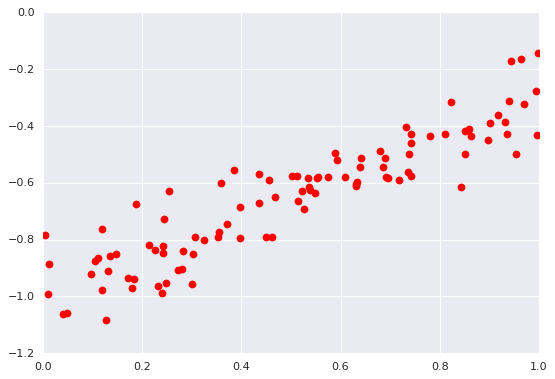

In [3]:
plt.figure(1)
plt.plot(x_train,t_train,'ro',label='Data')
plt.show()

In [14]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_mean(cross_entropy)

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 2500

In [15]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train,t:t_train})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train, t:t_train})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 0.784897, weight -0.390164, bias 0.373958
Step 200, cost 0.020013, weight 0.294546, bias -0.784963
Step 400, cost 0.008465, weight 0.575964, bias -0.936682
Step 600, cost 0.007576, weight 0.654020, bias -0.978764
Step 800, cost 0.007508, weight 0.675670, bias -0.990436
Step 1000, cost 0.007503, weight 0.681675, bias -0.993673
Step 1200, cost 0.007502, weight 0.683340, bias -0.994571
Step 1400, cost 0.007502, weight 0.683802, bias -0.994820
Step 1600, cost 0.007502, weight 0.683930, bias -0.994889
Step 1800, cost 0.007502, weight 0.683965, bias -0.994908
Step 2000, cost 0.007502, weight 0.683974, bias -0.994913
Step 2200, cost 0.007502, weight 0.683974, bias -0.994913
Step 2400, cost 0.007502, weight 0.683974, bias -0.994913


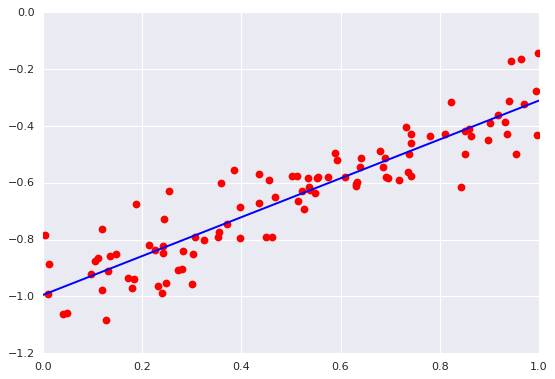

In [18]:
# 得られた w_outputとb_outputでグラフを表示する
x_line = np.linspace(0, 1.0, 100)
t_output = x_line * w_output + b_output
plt.figure()
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_line,t_output,'b-')
plt.show()